<a href="https://colab.research.google.com/github/gabrielutomo/Youtube-Music-Hits/blob/main/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier   # 🔹 Ganti ke Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time


#MEMBACA DATASET

In [ ]:
df = pd.read_csv("/content/youtube-top-100-songs-2025.csv")

print("5 data teratas:")
display(df.head())

5 data teratas:


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


CEK INFO DATASET

In [ ]:
print("\nInformasi dataset:")
df.info()
print("\nCek nilai kosong:")
print(df.isnull().sum())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB

Cek nilai kosong:
title             

PRA-PEMROSESAN DATASET

In [ ]:

# Hapus baris kosong
df = df.dropna()

# Pisahkan label (y) dan fitur (X)
y = df['categories']
X = df.drop(columns=['categories'])

# Ubah kolom kategorikal di fitur menjadi numerik (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)
print("\nFitur setelah encoding:")
display(X.head())




Fitur setelah encoding:


,view_count,duration,live_status,channel_follower_count,title_Alex Warren - Carry You Home (Official Video),title_Ariana Grande - intro (end of the world) (extended) (lyric visualizer),title_Ariana Grande - twilight zone (Official Lyric Video),title_Benson Boone - Mystical Magical (Official Lyric Video),title_Benson Boone - Slow It Down (Official Music Video),title_Billie Eilish - BIRDS OF A FEATHER (Official Music Video),...,channel_url_https://www.youtube.com/channel/UCoYfzC2zMlc9M-Odgaf6OSg,channel_url_https://www.youtube.com/channel/UCpx_k19S2vUutWUUM9qmXEg,channel_url_https://www.youtube.com/channel/UCqECaJ8Gagnn7YCbPEzWH6g,channel_url_https://www.youtube.com/channel/UCr2xjaS7CIx1OY7hYwrXb8A,channel_url_https://www.youtube.com/channel/UCrhnxJJV7DZfpbHh4iWjHNQ,channel_url_https://www.youtube.com/channel/UCtgNg5yxCyfjEE7Q7KeSmBw,channel_url_https://www.youtube.com/channel/UCuCRWL0H5WnXmPBJ3JdbVLA,channel_url_https://www.youtube.com/channel/UCvILah8hAWYhYOmAG3ZjvBA,channel_url_https://www.youtube.com/channel/UCy1FLad-XXw7QZGNuNIuMow,channel_url_https://www.youtube.com/channel/UCzcy-EepQ3Snt-twOTZ4hgg
0,2009014557,173,False,19200000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1324833300,252,False,29600000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2536628,160,False,408000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,558329099,231,False,56800000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2113548,180,False,408000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


SPLIT DATA (TRAIN DAN TEST)

BUAT DAN LATIH MODEL RANDOM FOREST

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,        # 🔹 jumlah pohon dalam hutan
    criterion='entropy',     # 🔹 sama seperti Decision Tree
    max_depth=6,             # 🔹 batas kedalaman tiap pohon
    random_state=42
)
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=6, random_state=42)

PREDIKSI DAN EVALUASI TABEL


🎯 Akurasi Model Random Forest: 100.00%

📊 Classification Report:
              precision    recall  f1-score   support

       Music       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


🧮 Confusion Matrix (angka):
[[17]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


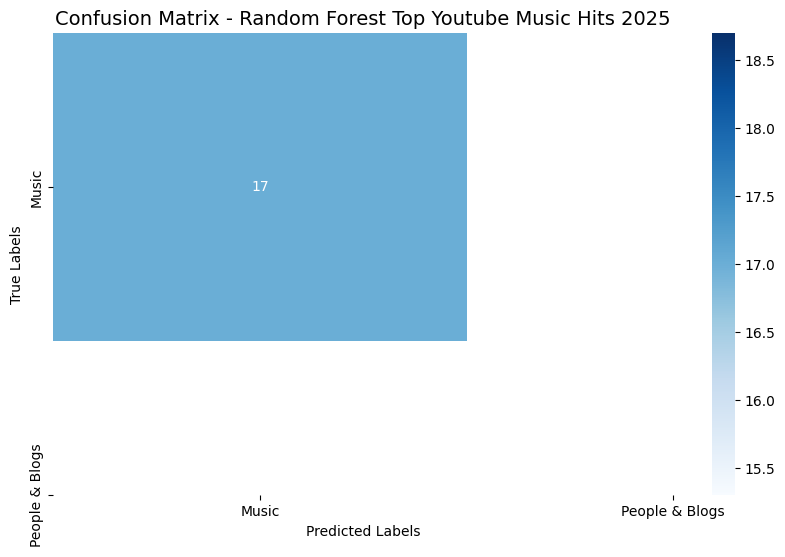

In [ ]:
y_pred = model.predict(X_test)

# Hitung akurasi dalam persen
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\n🎯 Akurasi Model Random Forest: {accuracy:.2f}%")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix (angka)
cm = confusion_matrix(y_test, y_pred)
print("\n🧮 Confusion Matrix (angka):")
print(cm)

# ==========================================
# 🔍 Visualisasi Confusion Matrix
# ==========================================
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Top Youtube Music Hits 2025", fontsize=14)
plt.show()

VISUALISASI SALAH SATU DECISION TREE DALAM RANDOM FOREST

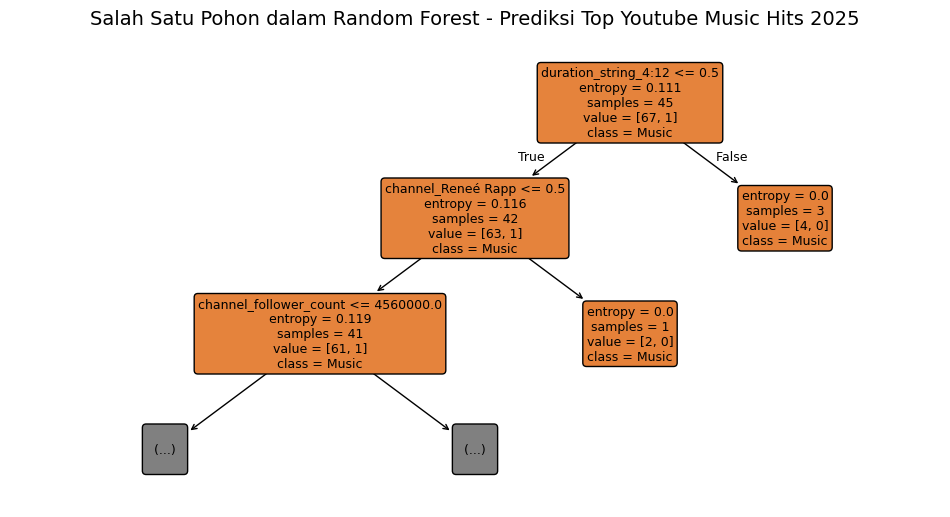

In [ ]:
from sklearn.tree import plot_tree

# Tampilkan salah satu pohon (misalnya pohon ke-0)
plt.figure(figsize=(12, 6))
plot_tree(
    model.estimators_[0],      # 🔹 ambil pohon pertama
    filled=True,
    feature_names=X.columns,
    class_names=model.classes_,
    rounded=True,
    fontsize=9,
    max_depth=2
)
plt.title("Salah Satu Pohon dalam Random Forest - Prediksi Top Youtube Music Hits 2025", fontsize=14, pad=15)
plt.show()

INPUTAN DARI USER UNTUK PREDIKSI MODEL MOBIL

In [ ]:
print("==== PREDIKSI MANUAL ====\n")

# Input dari pengguna
categories_input = input("Masukkan kategori (contoh: Music): ")
duration_input = float(input("Masukkan durasi dalam detik (contoh: 173): "))
tags_input = input("Masukkan tags (pisahkan dengan semicolon, contoh: Pop;Rock): ")
channel_input = input("Masukkan nama channel (contoh: ROSÉ): ")

# Buat DataFrame satu baris untuk prediksi
# Create a dictionary with the input values
user_input_dict = {
    'categories': [categories_input],
    'duration': [duration_input],
    'tags': [tags_input],
    'channel': [channel_input]
}

# Encoding kolom kategorikal agar sesuai model
user_input = pd.get_dummies(user_input)
user_input = user_input.reindex(columns=X.columns, fill_value=0)

# Prediksi menggunakan model Random Forest
prediksi = model.predict(user_input)[0]

print(f"\n🚗 Prediksi Top Youtube Music Hits 2025(Random Forest): {prediksi}")

==== PREDIKSI MANUAL ====

Masukkan kategori (contoh: Music): apt
Masukkan durasi dalam detik (contoh: 173): 173
Masukkan tags (pisahkan dengan semicolon, contoh: Pop;Rock): pop
Masukkan nama channel (contoh: ROSÉ): rose

🚗 Prediksi Top Youtube Music Hits 2025(Random Forest): Music


PERBANDINGAN TINGKAT AKURASI DARI 3 MODEL

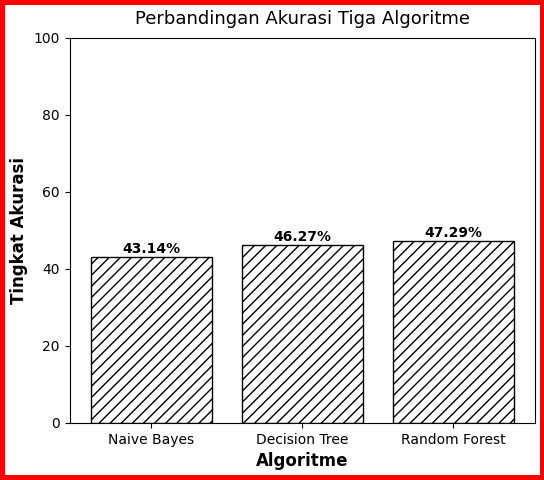

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Data model dan akurasinya
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
accuracy_values = [43.14, 46.27, 47.29]  # 🔹 ganti sesuai hasil modelmu (%)

# Warna dan pola batang
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, accuracy_values, color='white', edgecolor='black', hatch='///')

# Tampilkan nilai di atas batang
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{acc:.2f}%", ha='center', fontsize=10, fontweight='bold')

# Atur tampilan grafik
plt.ylim(0, 100)
plt.ylabel("Tingkat Akurasi", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Akurasi Tiga Algoritme", fontsize=13, pad=10)

# Hilangkan background
plt.gca().set_facecolor('white')
plt.grid(False)

# Tambahkan border luar seperti contoh
plt.gcf().patch.set_edgecolor('red')
plt.gcf().patch.set_linewidth(6)


PERBANDINGAN NILAI RECALL DARI 3 MODEL

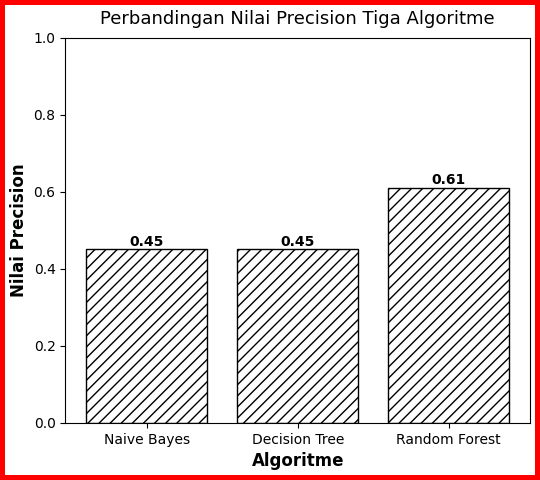

In [ ]:
# Data model dan precision-nya
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
precision_values = [0.45, 0.45, 0.61]

# Membuat diagram batang
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, precision_values, color='white', edgecolor='black', hatch='///')

# Menampilkan nilai precision di atas setiap batang
for bar, val in zip(bars, precision_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

# Pengaturan tampilan grafik
plt.ylim(0, 1)  # karena precision antara 0–1
plt.ylabel("Nilai Precision", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai Precision Tiga Algoritme", fontsize=13, pad=10)

# Mengatur gaya agar mirip contohmu
plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('red')
plt.gcf().patch.set_linewidth(6)

# Menampilkan grafik
plt.show()

PERBANDINGAN NILAI F1-SCORE DARI 3 MODEL

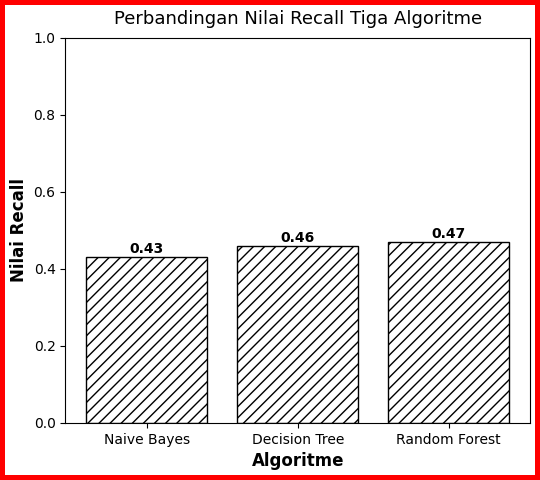

In [ ]:
# Data model dan recall-nya
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
recall_values = [0.43, 0.46, 0.47]

# Membuat diagram batang
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, recall_values, color='white', edgecolor='black', hatch='///')

# Menampilkan nilai recall di atas setiap batang
for bar, val in zip(bars, recall_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

# Pengaturan tampilan grafik
plt.ylim(0, 1)  # karena recall antara 0–1
plt.ylabel("Nilai Recall", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai Recall Tiga Algoritme", fontsize=13, pad=10)

# Gaya mirip contoh
plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('red')
plt.gcf().patch.set_linewidth(6)

# Menampilkan grafik
plt.show()

MENGHITUNG WAKTU EKSEKUSI

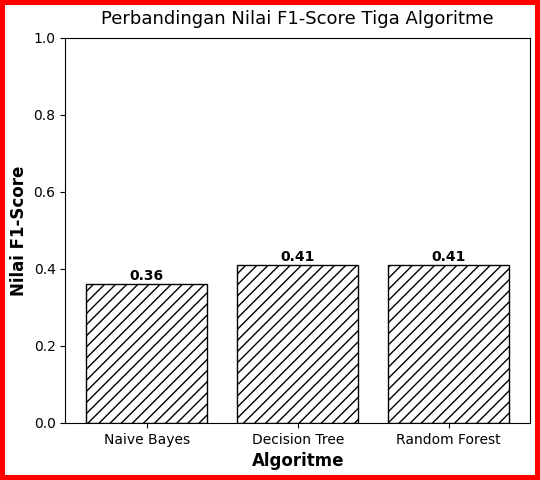

In [ ]:
# Data model dan F1-Score-nya
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest']
f1_values = [0.36, 0.41, 0.41]

# Membuat diagram batang
plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, f1_values, color='white', edgecolor='black', hatch='///')

# Menampilkan nilai F1-Score di atas setiap batang
for bar, val in zip(bars, f1_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

# Pengaturan tampilan grafik
plt.ylim(0, 1)  # karena F1-Score antara 0–1
plt.ylabel("Nilai F1-Score", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai F1-Score Tiga Algoritme", fontsize=13, pad=10)

# Gaya mirip contoh sebelumnya
plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('red')
plt.gcf().patch.set_linewidth(6)

# Menampilkan grafik
plt.show()

In [ ]:
start_time = time.time()

model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print(f"\n⏱️ Waktu eksekusi Random Forest: {execution_time:.4f} detik")



⏱️ Waktu eksekusi Random Forest: 0.2516 detik


HASIL AKHIR

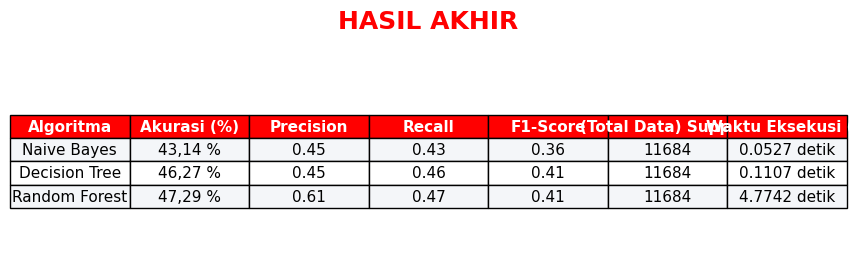

In [ ]:
# Data hasil akhir dari tiga model
data = {
    'Algoritma': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Akurasi (%)': ['43,14 %', '46,27 %', '47,29 %'],
    'Precision': [0.45, 0.45, 0.61],
    'Recall': [0.43, 0.46, 0.47],
    'F1-Score': [0.36, 0.41, 0.41],
    '(Total Data) Support': [11684, 11684, 11684],
    'Waktu Eksekusi (s)': ['0.0527 detik', '0.1107 detik', '4.7742 detik']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# ==========================================
# 🔹 VISUALISASI TABEL DENGAN MATPLOTLIB
# ==========================================
fig, ax = plt.subplots(figsize=(9, 2.8))
ax.axis('off')

# Header besar di atas tabel
plt.text(0.5, 1.15, 'HASIL AKHIR', ha='center', va='center',
         fontsize=18, fontweight='bold', color='#ff0000')

# Membuat tabel
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Gaya tabel
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.4)

# Warna header
for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header baris
        cell.set_facecolor('#ff0000')  # red
        cell.set_text_props(color='white', weight='bold')
    else:
        cell.set_facecolor('#F4F6F9')  # Abu muda
        if row % 2 == 0:
            cell.set_facecolor('#FFFFFF')  # Selang-seling putih

# Border tabel luar
for pos in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[pos].set_color('#0A3D91')
    plt.gca().spines[pos].set_linewidth(6)

plt.show()